In [1]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from keras.preprocessing.image import img_to_array
from imutils import paths
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/home/sergeyzin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_data(path):
    data = []
    labels = []
    image_paths = sorted(paths.list_images(path))
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        
        label = image_path.split(os.path.sep)[-2]
        labels.append(label)
        
    return data, labels

def preprocess_dataset(data):
    for i in range(len(data)):
        data[i] = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
        data[i] = cv2.adaptiveThreshold(data[i], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return data

In [3]:
data, labels = load_data('dataset')

In [4]:
data_transform = preprocess_dataset(data)
data_transform = np.array(data, dtype='float') / 255.0

In [5]:
data_flatten = np.array([data.flatten() for data in data_transform])

Eighth-Note


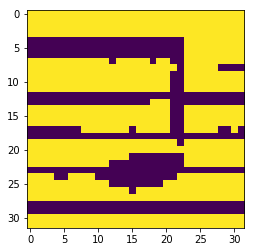

In [6]:
plt.imshow(data[300])
print(labels[300])

In [7]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_flatten, labels, test_size=0.2, shuffle=True)

In [49]:
knn = KNeighborsClassifier(n_neighbors=20)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [52]:
y_pred = knn.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(accuracy_score(y_test, y_pred))

                precision    recall  f1-score   support

   Eighth-Note       0.84      0.71      0.77       108
  Quarter-Note       0.58      0.97      0.73       100
Sixteenth-Note       0.95      0.42      0.59        92

   avg / total       0.79      0.71      0.70       300

0.71
